<a href="https://colab.research.google.com/github/berkyyd/Machine-Learning/blob/main/denetimsiz_ogrenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# veri setinde bağımlı değişken yoksa gözetimsiz öğrenme olur
# gözetimsiz öğrenme çeşitleri ;
# 1 -> K-Ortalamalar Yöntemi
# 2 -> Hiyerarşik Kümeleme Analizi
# 3 -> Temel Bileşen Analizi

K-Ortalamalar -> K-Means

In [ ]:
# gözlem birimlerini birbirlerine benzerliklerine göre kümelere ayırma
# küme sayısı belirlenir
# rastgele k merkez seçilir
# her gözlem için k merkezlere uzaklıklar hesaplanır
# her gözlem en yakın olduğu kümeye atanır
# atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır
# belirli bir iterasyonca tekrar edilir ve küme içi hata kareler toplamlarının minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir


In [ ]:
!pip install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [5]:
def load():
  df = pd.read_csv("USArrests.csv", index_col=0)
  return df
df = load()
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [8]:
sc = MinMaxScaler((0,1))
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [10]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
kmeans.cluster_centers_
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [12]:
kmeans.inertia_
# ssd -> hatalar toplamı

3.6834561535859147

Optimum Küme Sayısı

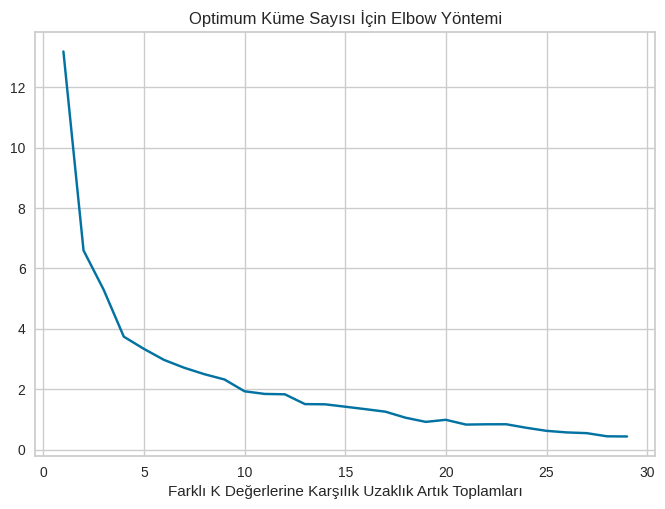

In [13]:
kmeans = KMeans()
ssd = []
K = range(1,30)

for k in K:
  kmeans = KMeans(n_clusters=k).fit(df)
  ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı İçin Elbow Yöntemi")
plt.show()

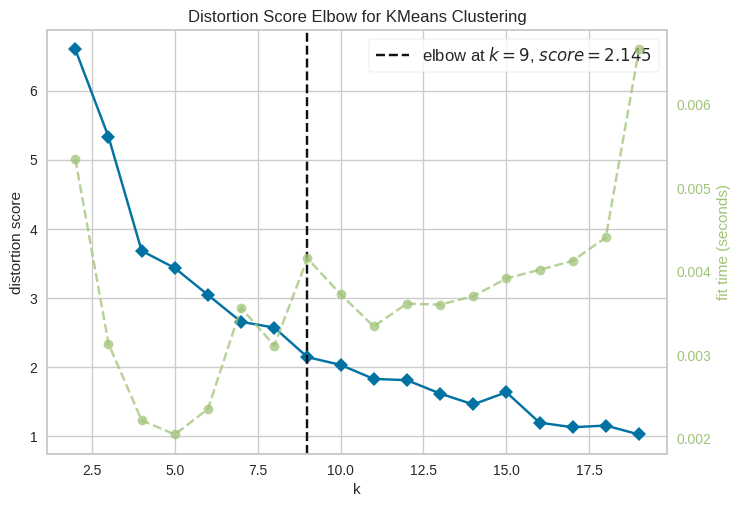

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show()
# en sert geçiş neredeyse o seçilir

In [15]:
  elbow.elbow_value_

9

Final K-Means Model

In [31]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [17]:
kmeans.cluster_centers_
kmeans.labels_
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [32]:
df = load()
kmeans_cluster = kmeans.labels_
df["km_cluster"] = kmeans_cluster
df["km_cluster"] = df["km_cluster"] + 1
df.head()


,Murder,Assault,UrbanPop,Rape,km_cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,9
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,9


In [21]:
df.groupby("cluster").agg(["mean", "count"])

Murder           Assault         UrbanPop             Rape      
              mean count        mean count       mean count       mean count
cluster                                                                     
1         7.340000    10  157.000000    10  63.300000    10  20.440000    10
2         3.075000     8   81.500000     8  58.125000     8  12.675000     8
3         9.700000     3  244.000000     3  83.333333     3  41.766667     3
4        14.500000     3  291.666667     3  45.666667     3  18.566667     3
5        14.800000     4  221.000000     4  60.750000     4  24.025000     4
6        11.383333     6  288.666667     6  69.833333     6  33.733333     6
7         4.955556     9  125.444444     9  80.111111     9  17.788889     9
8         3.125000     4   65.000000     4  40.000000     4  10.150000     4
9        11.400000     3  234.666667     3  83.000000     3  25.200000     3

In [22]:
df.to_csv("cluster.csv", index=False)

Hiyerarşik Kümeleme Analizi

In [ ]:
# gözlemler birleşe birleşe daha fazla gözlemle daha az küme oluşturur
# dendrogram ile gösterilir

In [23]:
df = load()
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [24]:
hc_average = linkage(df, "average")

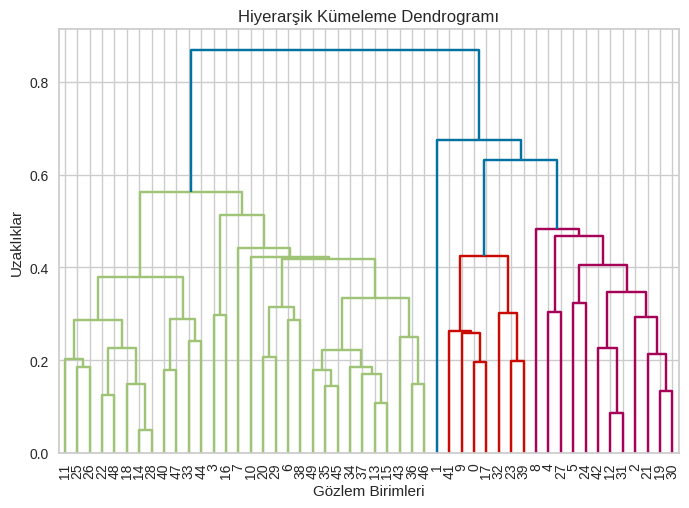

In [25]:
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

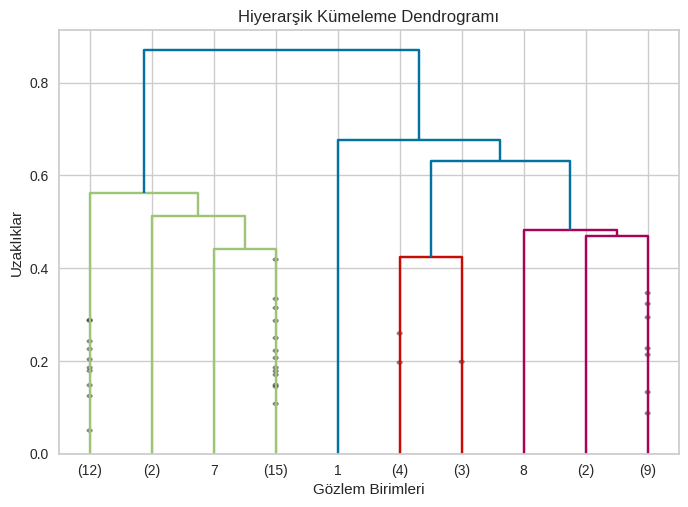

In [27]:
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

Küme Sayısı Belirleme

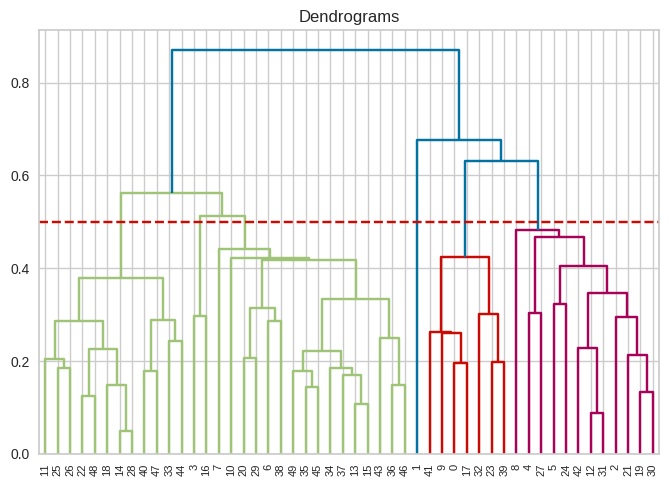

In [28]:
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

Final Modeli

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")
clusters = cluster.fit_predict(df)

In [ ]:
df = load()

In [33]:
df["hi_cluster"] = clusters
df["hi_cluster"] = df["hi_cluster"] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,km_cluster,hi_cluster
Alabama,13.2,236,58,21.2,1,4
Alaska,10.0,263,48,44.5,1,3
Arizona,8.1,294,80,31.0,9,2
Arkansas,8.8,190,50,19.5,3,1
California,9.0,276,91,40.6,9,2


Temel Bileşen Analizi

In [34]:
# çok değişkenli verinin ana özelliklerini daha az sayıda değişken ile temsil eder
# küçük miktarda bir bilgi kaybını göze alarak indirgeme işlemidir

In [37]:
def load_hit():
  df = pd.read_csv("hitters.csv")
  return df
df = load_hit()

In [39]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and 'Salary' not in col]
df = df[num_cols]
df.dropna(inplace=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [40]:
df = StandardScaler().fit_transform(df)

pca = PCA()
pca_fit = pca.fit_transform(df)

In [42]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [ ]:
# üstte sırayla kaç bileşen verinin % kaçını açıklayabiliyor onu görüyoruz
# ilk bileşen tek başına %46 2. bileşen gelince toplam %72 ye çıkıyor

Optimum Bileşen Sayısı

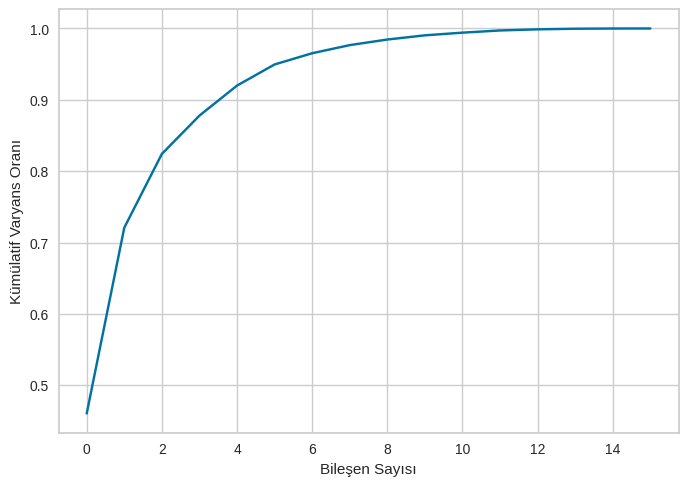

In [43]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

Final PCA

In [44]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [ ]:
# bunlarda tek başlarına açıkladıkları oranlar

Temel Bileşen Regresyon Modeli

In [45]:
df = load_hit()

In [46]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and 'Salary' not in col]
others = [col for col in df.columns if col not in num_cols]

In [47]:
pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,0.253173,0.776066
1,0.245488,-1.302951,0.118040
2,0.603883,2.617002,-0.698183
3,3.591276,-0.547821,-1.049022
4,-2.264528,0.698898,-1.290536


In [48]:
final_df = pd.concat([df[others], pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"])], axis=1)
final_df.head()

,League,Division,Salary,NewLeague,PC1,PC2,PC3
0,A,E,NaN,A,-3.240106,0.253173,0.776066
1,N,W,475.0,N,0.245488,-1.302951,0.118040
2,A,W,480.0,A,0.603883,2.617002,-0.698183
3,N,E,500.0,N,3.591276,-0.547821,-1.049022
4,N,E,91.5,N,-2.264528,0.698898,-1.290536


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
def label_encoder(dataframe, binary_col):
  label_encoder = LabelEncoder()
  dataframe[binary_col] = label_encoder.fit_transform(dataframe[binary_col])
  return dataframe

for col in ["League", "Division", "NewLeague"]:
  label_encoder(final_df, col)

In [53]:
final_df.dropna(inplace=True)

In [54]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [55]:
lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

345.60211063519665

In [56]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

375.62471463375675

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
cart_params = {"max_depth": range(1,10),
              "min_samples_split": range(2,10)}

cart_best_grid = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [59]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)


In [60]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

331.2894919668362

In [ ]:
# label olmayan veri setinde nasıl sınıflandırma yapılır

# eldeki verileri kümeleriz sonraki değerler için bu kümeler aslında sınıflar olur


PCA Görselleştirme

In [75]:
def load_cancer():
  df = pd.read_csv("breast_cancer.csv")
  return df
df = load_cancer()

In [76]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [77]:
def create_pca_df(X, y):
  X = StandardScaler().fit_transform(X)
  pca = PCA(n_components=2)
  pca_fit = pca.fit_transform(X)
  pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])
  final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
  return final_df

In [78]:
pca_df = create_pca_df(X, y)
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


In [73]:
import random

In [82]:
def plot_pca(dataframe, target):
  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel("PC1", fontsize=15)
  ax.set_ylabel("PC2", fontsize=15)
  ax.set_title(f'{target.capitalize()}', fontsize=20)

  targets = list(dataframe[target].unique())
  len(targets)
  colors = random.sample(['r', 'b', 'g', 'y'], len(targets))

  for t, color in zip(targets, colors):
    indices = dataframe[target] == t
    ax.scatter(dataframe.loc[indices, "PC1"],
               dataframe.loc[indices, "PC2"],
               c=color,
               s=50)
  ax.legend(targets)
  ax.grid()
  plt.show()

# temel pca görselleştirme fonksiyonu

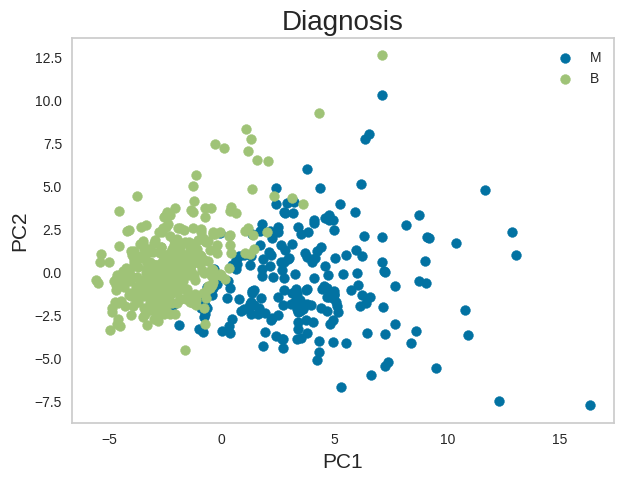

In [79]:
plot_pca(pca_df, "diagnosis")

In [68]:
import seaborn as sns

In [80]:
df = sns.load_dataset("iris")
y = df["species"]
X = df.drop(["species"], axis=1)

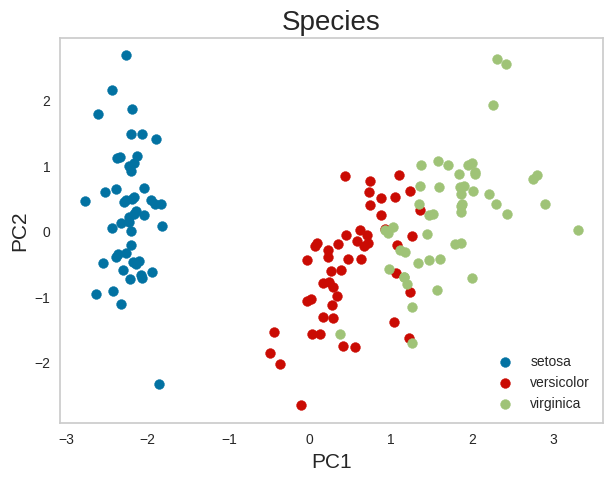

In [83]:
pca_df = create_pca_df(X, y)
plot_pca(pca_df, "species")